# Purpose: Do a constant times the time derivative of the logistic fit to cumulative deforestation, plus four Gaussians fit to carbon emissions from land use changes from 1850-2005 from the reference at the end of this notebook.  

Set the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from numpy import *
from scipy.optimize import curve_fit
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17CO2')

Read the landuse historical data, and plug in the parameters of deforestation.

In [2]:
df = pd.read_excel('Global_land-use_flux-1850_2005.xlsx')
df.to_csv('heat18Global_land-use_flux-1850_2005.csv',header=False,index=False)
df1 = pd.read_csv('heat18Global_land-use_flux-1850_2005.csv')
df2 = df1.iloc[:-1]
yrs = df2.iloc[:,0:1]
emitc = df2.iloc[:,1:2]
emitc = emitc['Global'].tolist()
emitc = list(map(float, emitc))
newemitc = [x / 1000 for x in emitc]
emitc = list(map(str, newemitc))
emitc = pd.DataFrame({'GtonneC':emitc})
df = pd.merge(yrs, emitc, left_index =True, right_index =True,how='outer') # merge two dataframes by using the index from the left DataFrame as the join key
df = df.astype(float) # Cast a pandas object to a specified dtype float.

f = open('C:\\Users\\cd7\\Desktop\\Heat17Deforest\\CAGE_Deforest_Parameters.csv','r')
readFile = csv.reader(f)
data = [row for row in readFile]
b51 = float(data[1][1]) # from results of deforestation 
b61 = float(data[2][1])
b71 = float(data[3][1])
print (b51,b61,b71)
t = yrs['Year'].tolist()
t = list(map(float, t))
t = np.array(t, dtype=np.float)
emitc = df.iloc[:,1:2]
emitc = emitc['GtonneC'].tolist()
emitc = list(map(float, emitc))

3.46508367669644 2003.34383068 162.69637406995884


Define the fitted gussian function and take derivative of logistic function w.r.t time, fit data

In [7]:
def f(t):
    y = np.gradient(b51/(1 + np.exp(-(t-b61)/b71)),t)
    return y
def gauss(t, g1, b1, d1, g2, b2, d2,g3, b3, d3, g4, b4, d4):
    y = g1 *np.exp(-0.5*((t-b1)/d1)**2)+g2 *np.exp(-0.5*((t-b2)/d2)**2)+g3 *np.exp(-0.5*((t-b3)/d3)**2)+g4 *np.exp(-0.5*((t-b4)/d4)**2)
    return y
def femit(t,g1, b1, d1, g2, b2, d2,g3, b3, d3, g4, b4, d4,b8):
    y = gauss(t, g1, b1, d1, g2, b2, d2,g3, b3, d3, g4, b4, d4) + f(t)*b8
    return y
param_bounds=([0,1900,15,0,1900,0,0,1900,5,0.5,1950,10,100],[0.5,1950,25,0.5,1950,10,1,2000,15,1.5,2050,20,150])
popt,pcov = curve_fit(femit, t, emitc, bounds=param_bounds)
print (popt)
print (b51)
print (b61)
print (b71)
print (popt[-1])

[2.42864951e-01 1.91094539e+03 1.96599739e+01 1.99792342e-01
 1.93279127e+03 5.56215763e+00 7.70810565e-01 1.95972901e+03
 9.13055216e+00 9.65507686e-01 1.99314506e+03 1.52195163e+01
 1.21984150e+02]
3.46508367669644
2003.34383068
162.69637406995884
121.98414958814918


Make plots, and compare the fitted plot with historical data.

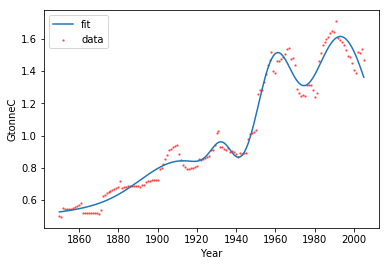

In [4]:
df.plot.scatter(x='Year',y='GtonneC',s=2,color = 'r', alpha = 0.5,label ='data',marker='o')
t = np.array(t)
y = femit(t, *popt)
plt.plot(t,y, label="fit")
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GtonneC')
plt.savefig('co23.eps',dpi=1000)